In [0]:
import pandas as pd
import numpy as np
import math
import random
from sklearn.utils import shuffle
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

a.Divide the dataset as development and test.

In [172]:
def mean_std(x):
  x = np.array(x).astype(np.float)
  y = np.std(x,axis=0)
  z = np.mean(x,axis=0)
  return y,z

def data():
  x_train = []
  y_test = []
  train_data = []
  with open("./assignment2/iris.data") as f:
    for line in f.read().splitlines():
      line = line.split(',')
      train_data.append(line)
    df = pd.DataFrame(train_data,columns=['sepal_length','sepal_width','petal_length','petal_width','class'])
    df = shuffle(df)
    print('Train_set:')
    print(df[:100])
    print('Dev_set:')
    print(df[100:125])
    print('Test_set:')
    print(df[125:])
    x_train = df.values[:50,:-1]
    y_train = df.values[:50,-1]
    x_dev = df.values[50:100,:-1]
    y_dev = df.values[50:100,-1]
    x_test = df.values[100:,:-1]
    y_test = df.values[100:,-1]
    return x_train,y_train,x_dev,y_dev,x_test,y_test
x_train,y_train,x_dev,y_dev,x_test,y_test = data()

x_train_m,x_train_s = mean_std(x_train)
x_dev_m,x_dev_s = mean_std(x_dev)
x_test_m,x_test_s = mean_std(x_test)

Train_set:
    sepal_length sepal_width petal_length petal_width            class
73           6.1         2.8          4.7         1.2  Iris-versicolor
53           5.5         2.3          4.0         1.3  Iris-versicolor
65           6.7         3.1          4.4         1.4  Iris-versicolor
100          6.3         3.3          6.0         2.5   Iris-virginica
12           4.8         3.0          1.4         0.1      Iris-setosa
..           ...         ...          ...         ...              ...
114          5.8         2.8          5.1         2.4   Iris-virginica
38           4.4         3.0          1.3         0.2      Iris-setosa
62           6.0         2.2          4.0         1.0  Iris-versicolor
32           5.2         4.1          1.5         0.1      Iris-setosa
59           5.2         2.7          3.9         1.4  Iris-versicolor

[100 rows x 5 columns]
Dev_set:
    sepal_length sepal_width petal_length petal_width            class
63           6.1         2.9     

b.Implement KNN using the following hyperparameters

number of neighbor K 
1,3,5,7

distance metric

euclidean distance, normalized euclidean distance, cosine similarity




In [0]:
def euclidean(input1,input2):
  input1 = np.array(input1).astype(np.float)
  input2 = np.array(input2).astype(np.float)
  distants = np.sqrt(np.sum(np.square(np.subtract(input1,input2))))
  return distants

def normalized_euclidean(input1,input2):
  input1 = (np.array(input1).astype(np.float)-x_dev_m.astype(np.float))/x_dev_s.astype(np.float)
  input2 = (np.array(input2).astype(np.float)-x_train_m.astype(np.float))/x_train_s.astype(np.float)
  distants = np.sqrt(np.sum(np.square(np.subtract(input1,input2))))
  return distants

def cosine(input1,input2):
  input1 = np.array(input1).astype(np.float)
  input2 = np.array(input2).astype(np.float)
  distants = -np.dot(input1,input2)/(np.linalg.norm(input1)*np.linalg.norm(input2))
  return distants

In [0]:
def KNN(input,data_set,data_set_label,k:int,model:int):
  result = []
  for i in input:
    distance = [] #distance between input i and every sample in the training set
    for j in data_set:
      if model == 1:
        d = euclidean(i,j)
      elif model == 2:
        d = normalized_euclidean(i,j)
      elif model == 3:
        d = cosine(i,j)
      distance.append(d)
    knn = sorted(distance)[:k] #find k neighbour
    knn_label = []
    index = []
    knn_count = {}
    for q in knn: # find k neighbour label
       index.append(distance.index(q))
       knn_label.append(data_set_label[distance.index(q)])
    for i in knn_label:
      if i not in knn_count.keys():
        knn_count[i] = knn_label.count(i)
    res = max(knn_count,key=lambda x:knn_count[x])
    # print(knn_count)
    # print(res)
    result.append(res)
  return result
#print(label)

c.Using the development dataset

1.Calculate accuracy by iterating all of the development data point

2.Find optimal hyperparameters

3.Draw bar charts for accuracy


Euclidean distance

K=1:0.92
K=3:0.9
K=5:0.88
K=7:0.9


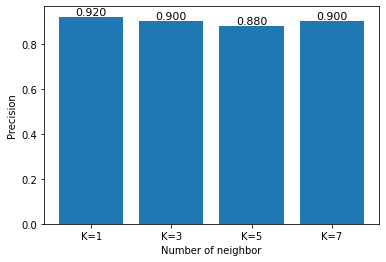

In [175]:
label1 = KNN(x_dev,x_train,y_train,1,1)
label2 = KNN(x_dev,x_train,y_train,3,1)
label3 = KNN(x_dev,x_train,y_train,5,1)
label4 = KNN(x_dev,x_train,y_train,7,1)
result1 = metrics.accuracy_score(y_dev,label1)
result2 = metrics.accuracy_score(y_dev,label2)
result3 = metrics.accuracy_score(y_dev,label3)
result4 = metrics.accuracy_score(y_dev,label4)
print("K=1:"+str(result1))
print("K=3:"+str(result2))
print("K=5:"+str(result3))
print("K=7:"+str(result4))
name = ['K=1','K=3','K=5','K=7']
result = [result1,result2,result3,result4]
plt.bar(name,result)
plt.xlabel('Number of neighbor')
plt.ylabel('Precision')
for a, b in zip(name, result):
 plt.text(a, b, '%.3f' % b, ha='center', va='bottom', fontsize=11)
plt.show()

Normalized euclidean distance

K=1:0.94
K=3:0.94
K=5:0.92
K=7:0.92


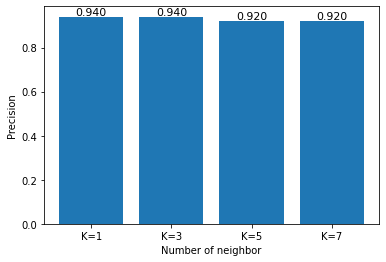

In [176]:
label1 = KNN(x_dev,x_train,y_train,1,2)
label2 = KNN(x_dev,x_train,y_train,3,2)
label3 = KNN(x_dev,x_train,y_train,5,2)
label4 = KNN(x_dev,x_train,y_train,7,2)
result1 = metrics.accuracy_score(y_dev,label1)
result2 = metrics.accuracy_score(y_dev,label2)
result3 = metrics.accuracy_score(y_dev,label3)
result4 = metrics.accuracy_score(y_dev,label4)
print("K=1:"+str(result1))
print("K=3:"+str(result2))
print("K=5:"+str(result3))
print("K=7:"+str(result4))
name = ['K=1','K=3','K=5','K=7']
result = [result1,result2,result3,result4]
plt.bar(name,result)
plt.xlabel('Number of neighbor')
plt.ylabel('Precision')
for a, b in zip(name, result):
 plt.text(a, b, '%.3f' % b, ha='center', va='bottom', fontsize=11)
plt.show()

Cosine similarity

K=1:0.94
K=3:0.9
K=5:0.86
K=7:0.92


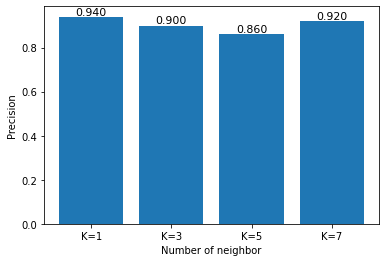

In [177]:
label1 = KNN(x_dev,x_train,y_train,1,3)
label2 = KNN(x_dev,x_train,y_train,3,3)
label3 = KNN(x_dev,x_train,y_train,5,3)
label3 = KNN(x_dev,x_train,y_train,7,3)
result1 = metrics.accuracy_score(y_dev,label1)
result2 = metrics.accuracy_score(y_dev,label2)
result3 = metrics.accuracy_score(y_dev,label3)
result4 = metrics.accuracy_score(y_dev,label4)
print("K=1:"+str(result1))
print("K=3:"+str(result2))
print("K=5:"+str(result3))
print("K=7:"+str(result4))
name = ['K=1','K=3','K=5','K=7']
result = [result1,result2,result3,result4]
plt.bar(name,result)
plt.xlabel('Number of neighbor')
plt.ylabel('Precision')
for a, b in zip(name, result):
 plt.text(a, b, '%.3f' % b, ha='center', va='bottom', fontsize=11)
plt.show()

So we choose the best perfomance model:

Normalized euclidean distance

Number of neibhbor: K=3

d.Using the test dataset


In [180]:
label = KNN(x_test,x_train,y_train,3,3)
result = metrics.accuracy_score(y_test,label)
print("Precision:"+str(result))

Precision:0.96
